# Diabetes Prediction Dataset Analysis

This notebook analyzes a dataset related to diabetes prediction. The dataset contains various features such as age, BMI, blood glucose levels, and more, which are used to predict whether a patient has diabetes.

## Importing Libraries and Loading Data

First, we import the necessary libraries and load the dataset.

In [1]:
import pandas as pd
df=pd.read_csv('/content/sample_data/diabetes_prediction_dataset.csv')

In [2]:
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,classification_report

## Exploring the Dataset

We start by exploring the dataset to understand its structure and contents.

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Checking Dataset Size and Missing Values

Next, we check the size of the dataset and look for any missing values.

In [5]:
df.size

900000

In [6]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


## Dataset Information

We also check the basic information about the dataset, including the data types of each column.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


mutual exclusion

## Mutual Information Analysis

We perform a mutual information analysis to understand the relationship between the features and the target variable (diabetes).

In [8]:
X2 = df.copy()
Y2 = X2.pop('diabetes')
Encoding_dict = {}
for col in X2.select_dtypes(['object']):
  X2[col],array = X2[col].factorize()
  Encoding_dict[col] = array

discrete_feat = [pd.api.types.is_integer_dtype(t) for t in X2.dtypes]
mi_score =mutual_info_classif(X2,Y2,discrete_features=discrete_feat)
mi_scores =pd.Series(mi_score, name="MI Scores", index=X2.columns)
mi_scores =mi_scores.sort_values(ascending = False)
print(mi_scores)

HbA1c_level            0.131586
blood_glucose_level    0.112074
age                    0.040206
bmi                    0.026409
hypertension           0.013512
smoking_history        0.009828
heart_disease          0.009459
gender                 0.000716
Name: MI Scores, dtype: float64


## Descriptive Statistics

We generate descriptive statistics for the dataset to get a summary of the central tendency, dispersion, and shape of the distribution.

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


## One-Hot Encoding for Categorical Variables

We perform one-hot encoding on categorical variables to convert them into a format that can be provided to machine learning algorithms.

In [10]:
df = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)


## Checking Dataset Information After Encoding

After encoding, we check the dataset information again to ensure the categorical variables have been properly encoded.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Male                  100000 non-null  bool   
 8   gender_Other                 100000 non-null  bool   
 9   smoking_history_current      100000 non-null  bool   
 10  smoking_history_ever         100000 non-null  bool   
 11  smoking_history_former       100000 non-null  bool   
 12  smoking_history_never        100000 non-null  bool   
 13  

In [12]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,gender_Other,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,True,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,True,False,False,False,False


## Visualizing the Distribution of Numerical Features

We visualize the distribution of numerical features using histograms to understand their spread and identify any patterns.

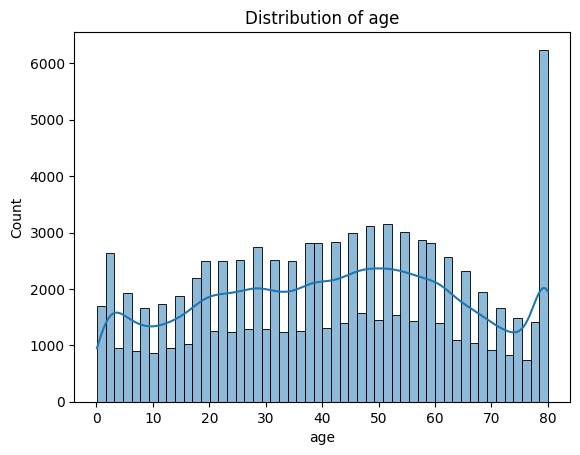

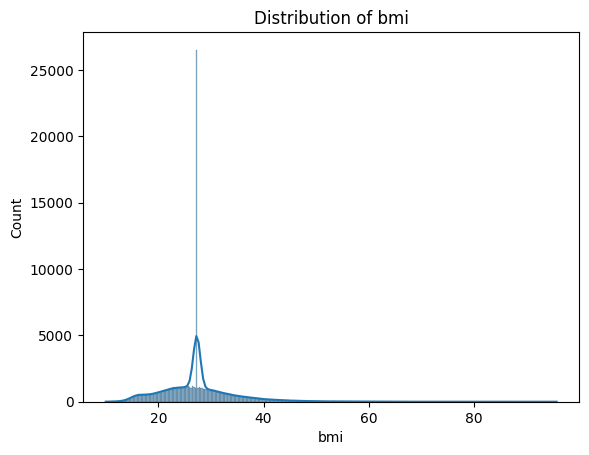

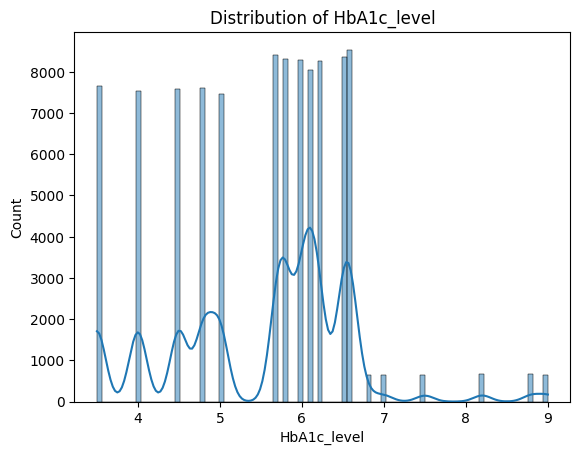

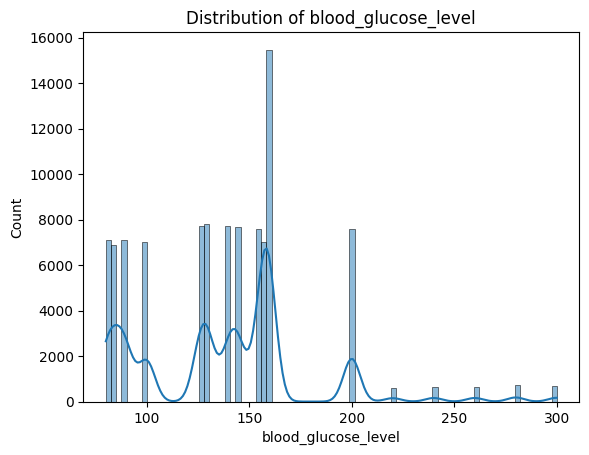

In [13]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
for feature in numerical_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# X = df.drop('diabetes', axis=1)
# y = df['diabetes']

# # Performing a minority oversampling
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)

## Data Preparation and Splitting

In this section, we prepare the data for model training by separating the features (X) and the target variable (y). We then split the data into training and testing sets using an 80-20 split.

In [14]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Scaling

We scale the features using MinMaxScaler to normalize the data. This ensures that all features contribute equally to the model training process by transforming them to a range between 0 and 1.

In [15]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


XGboost

## XGBoost Model Training

Here, we train an XGBoost model. The data is converted into DMatrix format, which is optimized for XGBoost. We define the parameters for binary classification and train the model using 100 boosting rounds.

In [16]:
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled)

pm={'objective':'binary:logistic','eval_metric':'logloss'}

diabetes_xgb_model=xgb.train(pm,dtrain,num_boost_round=100)

randomforest


## Random Forest Model Training

We train a Random Forest classifier with 100 estimators. The model is trained on the unscaled training data.

In [17]:
diabetes_rfModel=RandomForestClassifier(n_estimators=100,random_state=42)
diabetes_rfModel.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

## Neural Network Model Training

In this section, we define and train a neural network model using Keras. The model consists of two hidden layers with ReLU activation and an output layer with a sigmoid activation function. The model is compiled with binary cross-entropy loss and the Adam optimizer, and trained for 50 epochs.

In [18]:
diabetes_nnModel=Sequential()
diabetes_nnModel.add(Dense(32,input_dim=X_train_scaled.shape[1],activation='relu'))
diabetes_nnModel.add(Dense(16,activation='relu'))
diabetes_nnModel.add(Dense(1,activation='sigmoid'))

diabetes_nnModel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

diabetes_nnModel.fit(X_train_scaled,y_train,epochs=50,batch_size=25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9397 - loss: 0.2032
Epoch 2/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9592 - loss: 0.1172
Epoch 3/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9599 - loss: 0.1147
Epoch 4/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9594 - loss: 0.1164
Epoch 5/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9604 - loss: 0.1123
Epoch 6/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9602 - loss: 0.1137
Epoch 7/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9609 - loss: 0.1137
Epoch 8/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9624 - loss: 0.1094
Epoch 9/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9632 - loss: 0.1083
Epoch 10/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9646 - loss: 0.1056
Epoch 11/50
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9662 - loss: 0.1030
Epoch 12/50
3200/3200 ━

answer

## Model Evaluation

We evaluate the performance of the XGBoost, Neural Network, and Random Forest models using classification reports. The reports include precision, recall, F1-score, and support for each class, as well as overall accuracy.

In [21]:
#xg
xgb_pred = diabetes_xgb_model.predict(dtest)
xgb_pred_binary=[1 if pred>0.5 else 0 for pred in xgb_pred]

# #NN
nn_pred = diabetes_nnModel.predict(X_test_scaled)
nn_pred_binary=[1 if pred>0.5 else 0 for pred in nn_pred]


#rf
rf_pred=diabetes_rfModel.predict(X_test)

print("XGBoost score:", accuracy_score(y_test, xgb_pred_binary))
print("NN score:", accuracy_score(y_test, nn_pred_binary))
print("Random Forest score:", accuracy_score(y_test, rf_pred))


print("\nClassification Rpt for XGBoost:\n", classification_report(y_test, xgb_pred_binary))
print("\nClassification Rpt for NN:\n", classification_report(y_test, nn_pred_binary))
print("\nClassification Rpt  for Random Forest:\n", classification_report(y_test, rf_pred))
print("Random Forest roc auc score:", roc_auc_score(y_test, rf_pred))
print("XGBoost roc auc score:", roc_auc_score(y_test, xgb_pred_binary))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
XGBoost score: 0.97165
NN score: 0.9711
Random Forest score: 0.9699

Classification Rpt for XGBoost:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Classification Rpt for NN:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.99      0.67      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000


Classification Rpt  for Random Forest:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95 

In [22]:
import pickle
with open('diabetes_xgb_model.pkl', 'wb') as f:
    pickle.dump(diabetes_xgb_model, f)

with open('diabetes_rfModel.pkl', 'wb') as f:
    pickle.dump(diabetes_rfModel, f)

In [23]:
diabetes_nnModel.save('diabetes_nnModel.h5')